In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics,preprocessing,tree,linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder,label_binarize,LabelEncoder
%matplotlib inline
import warnings
import missingno
from sklearn.model_selection import cross_validate

In [8]:
train=pd.read_csv('Downloads/train.csv')
test=pd.read_csv('Downloads/test.csv')
gender=pd.read_csv('Downloads/gender_submission.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check the Missing Values

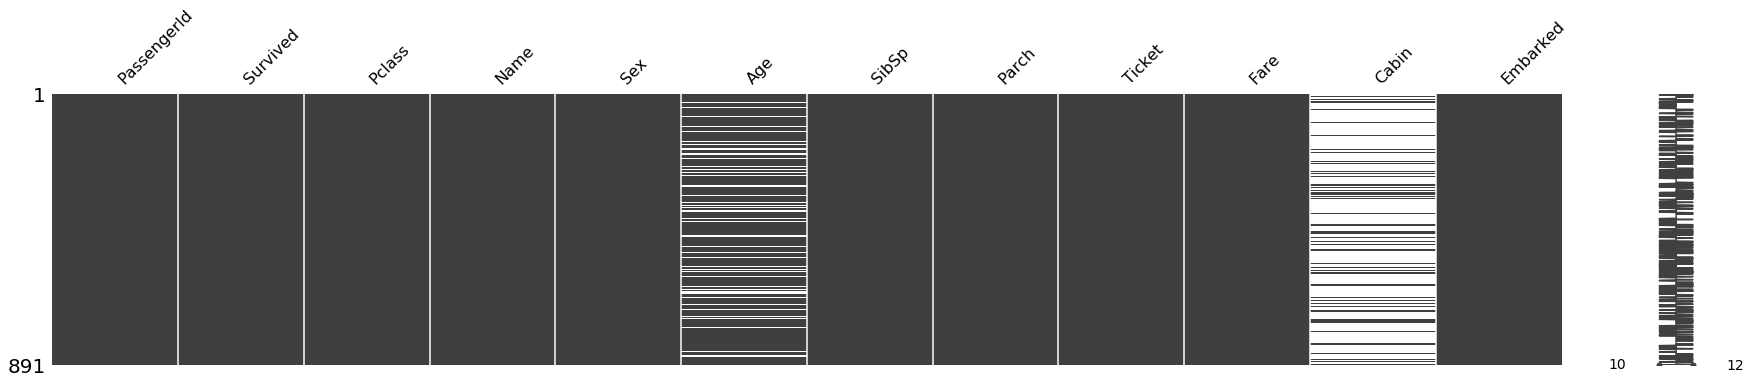

In [17]:
missingno.matrix(train,figsize=(30,5)) #plot graphic of missing values

In [34]:
def find_missing_values(df,columns):                       #find missing values counts
    missing_values={}
    print('number of missing or Nan values for each columns:')
    df_length = len(df)
    for columns in columns:
        total_columns_values=df[columns].value_counts().sum()
        missing_values[columns]=df_length-total_columns_values
    return missing_values
missing_values=find_missing_values(train,columns=train.columns)
missing_values

number of missing or Nan values for each columns:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [35]:
df_bin=pd.DataFrame() # for discretised continuous variables
df_con=pd.DataFrame() # for continuous variable

In [36]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


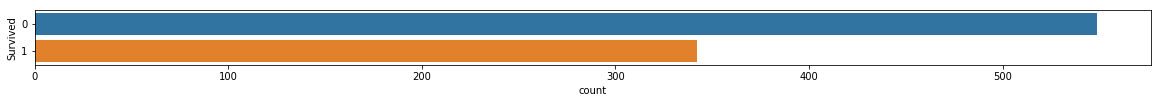

In [39]:
#now many people survied?
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [40]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [42]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [43]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


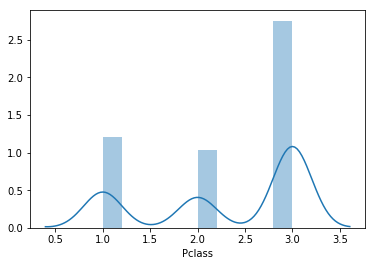

In [44]:
sns.distplot(train.Pclass)

In [45]:
missing_values['Pclass']

0

In [46]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [47]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [51]:
train.Name.value_counts().head(30)

Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)              1
Duran y More, Miss. Asuncion                                     1
Skoog, Master. Karl Thorsten                                     1
Svensson, Mr. Johan                                              1
Zimmerman, Mr. Leo                                               1
Yasbeck, Mrs. Antoni (Selini Alexander)                          1
Rekic, Mr. Tido                                                  1
Fortune, Miss. Mabel Helen                                       1
Crosby, Miss. Harriet R                                          1
Harrison, Mr. William                                            1
Hickman, Mr. Lewis                                               1
Andrew, Mr. Edgardo Samuel                                       1
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)               1
Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)              1
Persson, Mr. Ernst Ulrik                                      

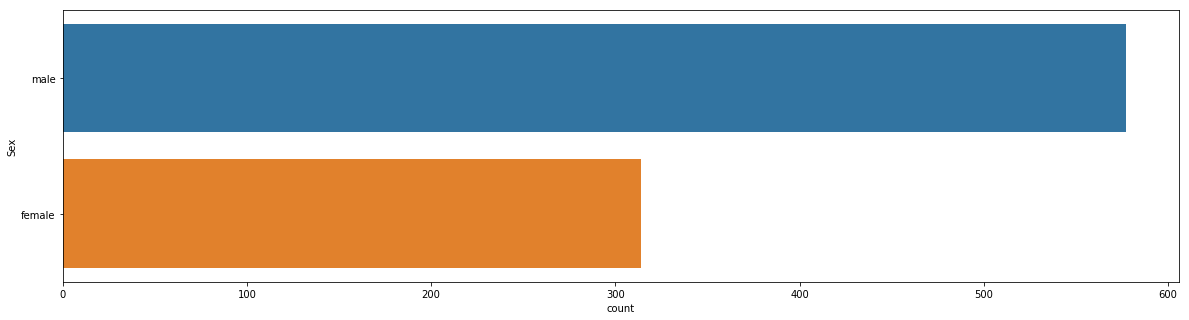

In [52]:
# see distribution of sex
plt.figure(figsize=(20,5))
sns.countplot(y='Sex',data=train)

In [53]:
#check the missing values
missing_values['Sex']

0

In [57]:
# add sec column to subset of dataframe
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0)
df_con['Sex']=train['Sex']

In [58]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


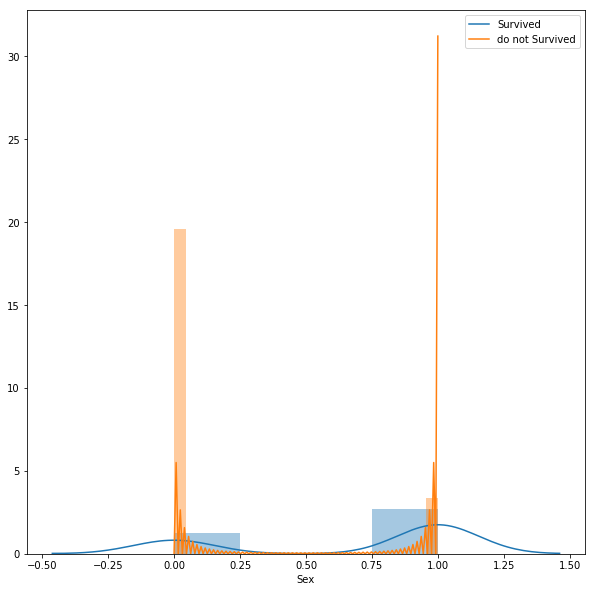

In [59]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'do not Survived'})

In [60]:
missing_values['Age'] # check the missing values

177

In [61]:
missing_values['SibSp']

0

In [62]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [67]:
#add SibSp subset Dataframe
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

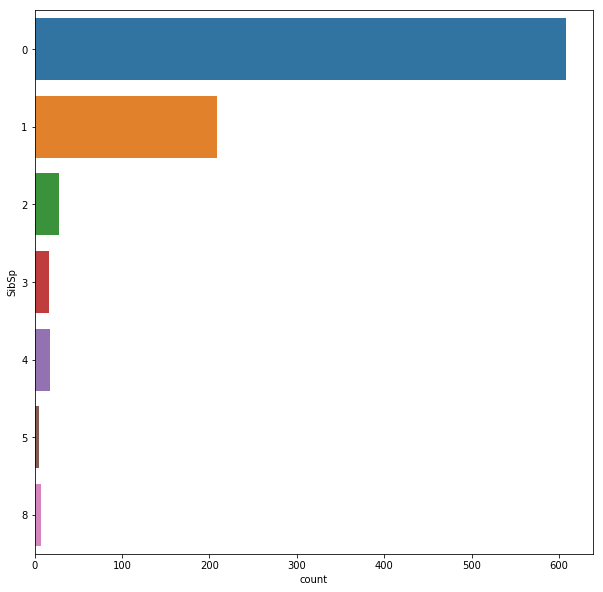

In [69]:
fig=plt.figure(figsize=(10,10))
sns.countplot(y='SibSp',data=train)


In [71]:
#Parch
missing_values['Parch']

0

In [73]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

In [74]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

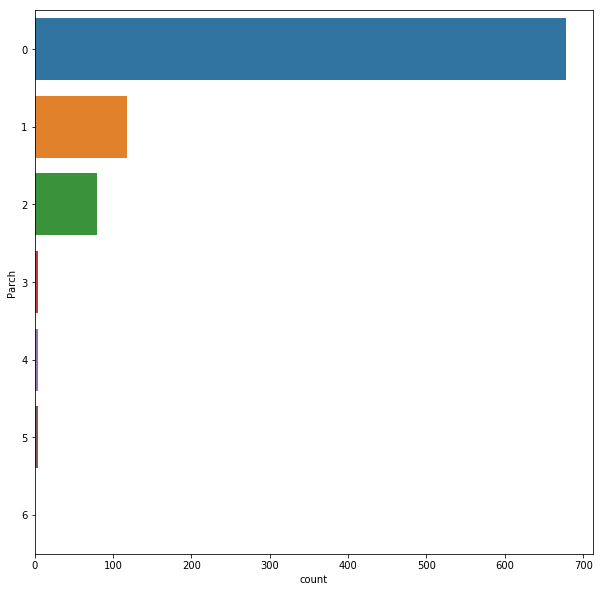

In [75]:
fig=plt.figure(figsize=(10,10))
sns.countplot(y='Parch',data=train)


In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


In [78]:
missing_values['Ticket']

0

In [80]:
train.Ticket.value_counts().head()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
Name: Ticket, dtype: int64

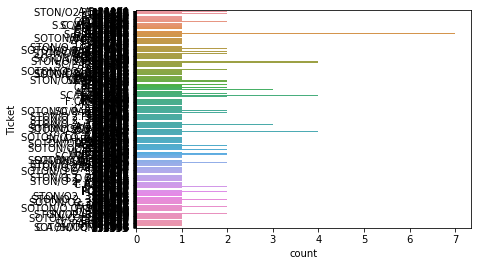

In [81]:
sns.countplot(y='Ticket',data=train) #check the fare difference.

In [82]:
missing_values['Fare']

0

In [84]:
train.Fare.value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

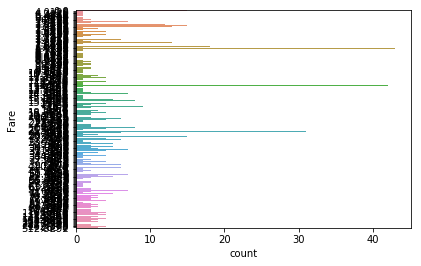

In [85]:
sns.countplot(y='Fare',data=train)

In [95]:
df_bin['Fare']=pd.cut(train['Fare'],bins=5)
df_con['Fare']=train['Fare']

In [87]:
print('There are {} unique Ticket values'.format(len(train.Ticket.unique())))

There are 681 unique Ticket values


In [92]:
print('there are {} unique Fare values'.format(len(train.Fare.unique())))

there are 248 unique Fare values


In [96]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [94]:
df_con.head()

,Survived,Pclass,Sex,SibSP,SibSp,Parch,Fare
0,0,3,male,1,1,0,7.2500
1,1,1,female,1,1,0,71.2833
2,1,3,female,0,0,0,7.9250
3,1,1,female,1,1,0,53.1000
4,0,3,male,0,0,0,8.0500


In [99]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

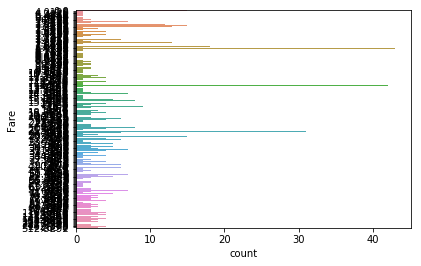

In [106]:
sns.countplot(y='Fare',data=train)

In [110]:
missing_values['Cabin']

687

In [111]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
F33            3
C22 C26        3
E101           3
C93            2
D17            2
E25            2
D35            2
B28            2
E8             2
B20            2
C123           2
C83            2
D26            2
B58 B60        2
C92            2
C2             2
B5             2
C78            2
C68            2
E33            2
D20            2
B77            2
C124           2
B35            2
E24            2
              ..
B50            1
A26            1
F38            1
C30            1
C32            1
B38            1
E38            1
A10            1
C7             1
B94            1
E34            1
B39            1
D50            1
D6             1
B82 B84        1
C128           1
E50            1
B19            1
C62 C64        1
C118           1
C104           1
B30            1
C106           1
B86            1
E49            1
A14            1
B41            1
A23           

In [115]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
missing_values['Embarked']

2

In [117]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [118]:
train.Embarked.value_counts().sum()

889

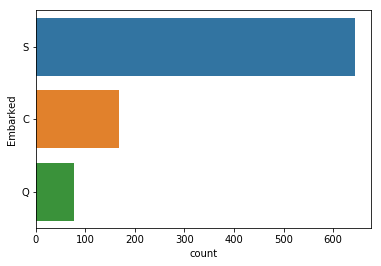

In [119]:
sns.countplot(y='Embarked',data=train)

In [130]:
# add Embarked to subset dataframe
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']


In [132]:
df_bin=df_bin.dropna(subset=['Embarked'])
df_con=df_con.dropna(subset=['Embarked'])

In [133]:
print(len(df_bin))
print(len(df_con))

889
889


In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [136]:
df_con.head()

,Survived,Pclass,Sex,SibSP,SibSp,Parch,Fare,Embarked
0,0,3,male,1,1,0,7.2500,S
1,1,1,female,1,1,0,71.2833,C
2,1,3,female,0,0,0,7.9250,S
3,1,1,female,1,1,0,53.1000,S
4,0,3,male,0,0,0,8.0500,S


In [155]:
one_hot_cols=df_bin.columns.tolist()   
one_hot_cols.remove('Survived')  #one-hot encodeing binned variables
df_bin_one=pd.get_dummies(df_bin,columns=one_hot_cols)

In [156]:
df_bin_one.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [157]:
#Label Encode all continuous value useing label encoder.
df_con_one=df_con.apply(LabelEncoder().fit_transform)
df_con_one.head()

,Survived,Pclass,Sex,SibSP,SibSp,Parch,Fare,Embarked
0,0,2,1,1,1,0,18,2
1,1,0,0,1,1,0,207,0
2,1,2,0,0,0,0,41,2
3,1,0,0,1,1,0,189,2
4,0,2,1,0,0,0,43,2


In [172]:
from sklearn.model_selection import cross_val_predict
import math,datetime,random

# Machine Learning

In [151]:
selected_df=df_con_one

In [158]:
#split the dataframe into data and label
X_train=selected_df.drop('Survived',axis=1) #data
y_train=selected_df.Survived #label

In [161]:
X_train.head()

,Pclass,Sex,SibSP,SibSp,Parch,Fare,Embarked
0,2,1,1,1,0,18,2
1,0,0,1,1,0,207,0
2,2,0,0,0,0,41,2
3,0,0,1,1,0,189,2
4,2,1,0,0,0,43,2


In [159]:
X_train.shape

(889, 7)

In [162]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [160]:
y_train.shape

(889,)

In [179]:
def fit_ml_algo(algo,X_train,y_train,cv):
    #one Pass
    model=algo.fit(X_train,y_train)
    acc=round(model.score(X_train,y_train)*100,2)
    #cross validation
    train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    #cross validation accuracy metric.
    acc_cv=round(metrics.accuracy_score(y_train,y_pred)*100,2)
    return train_pred,acc,acc_cv

# LogisticRegression

In [ ]:
lg=fit.lo 
train_pred_log,acc_log,acc_cv_log=fit_ml_algo(LogisticRegression(),
                                              X_train,y_train,10)
print('Accuracy %s',acc_log)
print('Accuracy CV 10-Fold:%s',acc_cv_log)